In [22]:
import os
import os
import nibabel as nib
import numpy as np
from scipy.ndimage import zoom

def resample_nifti_folder(input_folder, new_spacing=(0.5, 0.5, 0.5), new_direction=[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]):
    for filename in os.listdir(input_folder):
        if filename.endswith(".nii") or filename.endswith(".nii.gz"):  # Check if the file is a NIfTI file
            file_path = os.path.join(input_folder, filename)
            try:
                # Load NIfTI file
                nifti_img = nib.load(file_path)
                nifti_data = nifti_img.get_fdata()
                nifti_affine = nifti_img.affine

                # Calculate current voxel spacing
                current_spacing = np.sqrt(np.sum(nifti_affine[:3, :3] ** 2, axis=0))

                # Calculate zoom factors for resampling
                zoom_factors = np.divide(current_spacing, new_spacing)

                # Resample data
                resampled_data = zoom(nifti_data, zoom_factors, order=3)

                # Update affine transformation
                new_affine = np.copy(nifti_affine)
                new_affine[:3, :3] = np.array(new_direction) @ np.diag(new_spacing)

                # Create new NIfTI image
                resampled_img = nib.Nifti1Image(resampled_data, new_affine, header=nifti_img.header)

                # Save resampled image to new file
                output_file_path = os.path.join(input_folder, filename.replace('.nii', '_resampled.nii'))
                nib.save(resampled_img, output_file_path)

                print(f"Resampled file saved to: {output_file_path}")

            except Exception as e:
                print(f"Error processing file {file_path}: {str(e)}")

# Example usage:
input_folder = r"C:\Users\mario\Desktop\nifti_onlylobar - testing"  # Path to folder containing NIfTI files
resample_nifti_folder(input_folder)


Resampled file saved to: C:\Users\mario\Desktop\nifti_onlylobar - testing\1075451_resampled.nii.gz
Resampled file saved to: C:\Users\mario\Desktop\nifti_onlylobar - testing\1174563_resampled.nii.gz
Resampled file saved to: C:\Users\mario\Desktop\nifti_onlylobar - testing\1382349_resampled.nii.gz
Resampled file saved to: C:\Users\mario\Desktop\nifti_onlylobar - testing\1417858_resampled.nii.gz
Resampled file saved to: C:\Users\mario\Desktop\nifti_onlylobar - testing\1469159_resampled.nii.gz
Resampled file saved to: C:\Users\mario\Desktop\nifti_onlylobar - testing\1601959_resampled.nii.gz
Resampled file saved to: C:\Users\mario\Desktop\nifti_onlylobar - testing\1627009_resampled.nii.gz
Resampled file saved to: C:\Users\mario\Desktop\nifti_onlylobar - testing\1640134_resampled.nii.gz
Resampled file saved to: C:\Users\mario\Desktop\nifti_onlylobar - testing\1722078_resampled.nii.gz
Resampled file saved to: C:\Users\mario\Desktop\nifti_onlylobar - testing\180818_resampled.nii.gz
Resampled f

Image 1 Dimensions: itkSize3 ([512, 512, 225])
Image 1 Spacing: itkVectorD3 ([0.586621, 0.586621, 0.8])
Image 1 Origin: itkPointD3 ([-174.093, -317.436, -1100.33])
Image 1 Direction: itkMatrixD33 ([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
Image 2 Dimensions: itkSize3 ([512, 512, 225])
Image 2 Spacing: itkVectorD3 ([0.586621, 0.586621, 0.8])
Image 2 Origin: itkPointD3 ([-174.093, -317.436, -1100.33])
Image 2 Direction: itkMatrixD33 ([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])


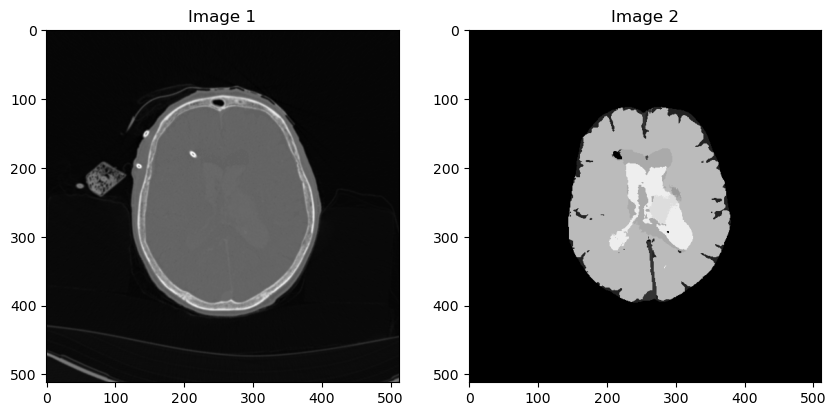

Image 1 Dimensions: itkSize3 ([512, 512, 225])
Image 1 Spacing: itkVectorD3 ([0.586621, 0.586621, 0.8])
Image 1 Origin: itkPointD3 ([-174.093, -317.436, -1100.33])
Image 1 Direction: itkMatrixD33 ([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
Image 2 Dimensions: itkSize3 ([465, 395, 225])
Image 2 Spacing: itkVectorD3 ([0.586621, 0.586621, 0.8])
Image 2 Origin: itkPointD3 ([-148.281, -252.321, -1100.33])
Image 2 Direction: itkMatrixD33 ([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])


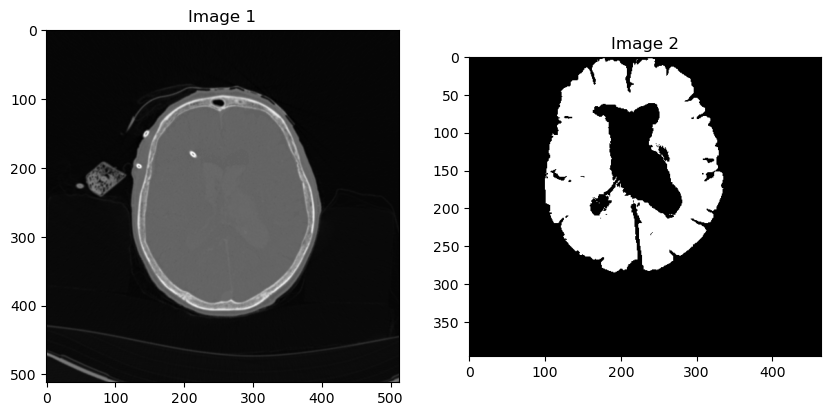

In [54]:
import itk
import numpy as np
import matplotlib.pyplot as plt

# Function to load an image and display its properties
def load_and_display_info(image_path_1, image_path_2):
    # Load the first image
    image_1 = itk.imread(image_path_1)
    print("Image 1 Dimensions:", itk.size(image_1))
    print("Image 1 Spacing:", itk.spacing(image_1))
    print("Image 1 Origin:", itk.origin(image_1))
    # Attempt to safely access the direction
    try:
        print("Image 1 Direction:", image_1.GetDirection())
    except AttributeError as error:
        print("Image 1 Direction not accessible:", error)
    
    # Load the second image
    image_2 = itk.imread(image_path_2)
    print("Image 2 Dimensions:", itk.size(image_2))
    print("Image 2 Spacing:", itk.spacing(image_2))
    print("Image 2 Origin:", itk.origin(image_2))
    # Attempt to safely access the direction
    try:
        print("Image 2 Direction:", image_2.GetDirection())
    except AttributeError as error:
        print("Image 2 Direction not accessible:", error)

    # Display the images using matplotlib
    array_1 = itk.array_from_image(image_1)
    array_2 = itk.array_from_image(image_2)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(array_1[array_1.shape[0] // 2], cmap='gray')  # Display the middle slice of image 1
    axes[0].set_title("Image 1")

    axes[1].imshow(array_2[array_2.shape[0] // 2], cmap='gray')  # Display the middle slice of image 2
    axes[1].set_title("Image 2")

    plt.show()

# Example usage
#load_and_display_info(r"C:\Users\mario\Desktop\testing ctscans nifti sin rotar\1972797_resampled.nii.gz",r"C:\Users\mario\Desktop\nifti_onlylobar - testing\1972797_resampled.nii.gz")
load_and_display_info(r"C:\Users\mario\Desktop\testing ctscans nifti sin rotar\1972797.nii.gz",r"C:\Users\mario\Desktop\nrrd original\1972797.nrrd")
load_and_display_info(r"C:\Users\mario\Desktop\testing ctscans nifti sin rotar\1972797.nii.gz",r"C:\Users\mario\Desktop\nrrd_onlylobar\1972797.nrrd")


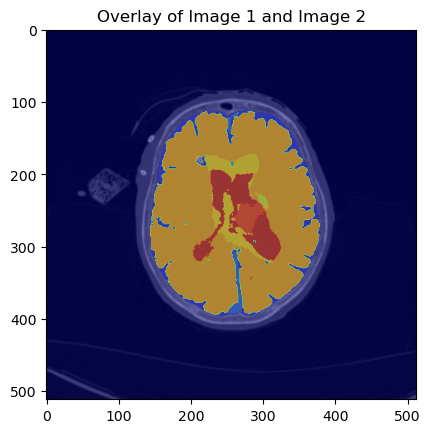

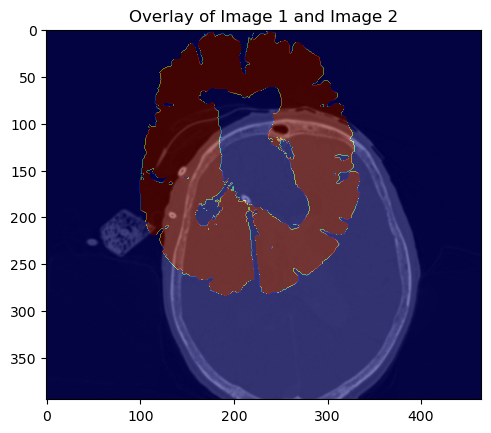

In [52]:
import itk
import numpy as np
import matplotlib.pyplot as plt

# Function to load an image and display its properties
def plot(image_path_1, image_path_2):
    # Load the first image
    image_1 = itk.imread(image_path_1)
    # Load the second image
    image_2 = itk.imread(image_path_2)

    # Get image arrays
    array_1 = itk.array_from_image(image_1)
    array_2 = itk.array_from_image(image_2)

    # Select the middle slice of each image
    mid_slice_1 = array_1[array_1.shape[0] // 2]
    mid_slice_2 = array_2[array_2.shape[0] // 2]

    # Display the images overlaid on each other
    fig, ax = plt.subplots()
    ax.imshow(mid_slice_1, cmap='gray')
    ax.imshow(mid_slice_2, cmap='jet', alpha=0.5)  # Overlay the second image with transparency
    ax.set_title("Overlay of Image 1 and Image 2")
    plt.show()

# resample
#plot(r"C:\Users\mario\Desktop\testing ctscans nifti sin rotar\1972797_resampled.nii.gz", r"C:\Users\mario\Desktop\nifti_onlylobar - testing\1972797_resampled.nii.gz")
#original
#plot(r"C:\Users\mario\Desktop\testing ctscans nifti sin rotar\1972797.nii.gz",r"C:\Users\mario\Desktop\nifti_onlylobar - testing\1972797.nii.gz")
#original nrrd
plot(r"C:\Users\mario\Desktop\testing ctscans nifti sin rotar\1972797.nii.gz",r"C:\Users\mario\Desktop\nrrd original\1972797.nrrd")
#original nrrd lobar
plot(r"C:\Users\mario\Desktop\testing ctscans nifti sin rotar\1972797.nii.gz",r"C:\Users\mario\Desktop\nrrd_onlylobar\1972797.nrrd")


